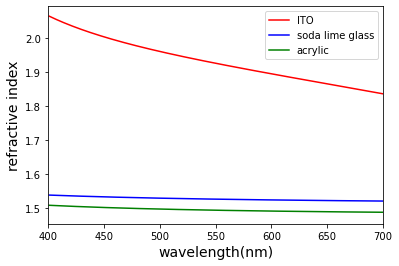

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
file =  pd.read_csv("ITO.csv")
wl = np.array([float(i) for i in file[:381]['wl']])
n = [float(i) for i in file[:381]['n']]
slg = [1.5130-0.003169*x**2+0.003962*x**-2 for x in wl]
PMMA = [(1+1.1819/(1-0.011313/x**2))**.5 for x in wl]
plt.xlim(400, 700)
plt.plot(wl*1e3, n, 'r', label = 'ITO')
plt.plot(wl*1e3, slg, 'b', label = 'soda lime glass')
plt.plot(wl*1e3, PMMA, 'g', label = 'acrylic')
plt.legend(loc = 'best')
plt.xlabel("wavelength(nm)", fontsize = 14)
plt.ylabel("refractive index", fontsize = 14)
#plt.savefig("n.png")
plt.show()

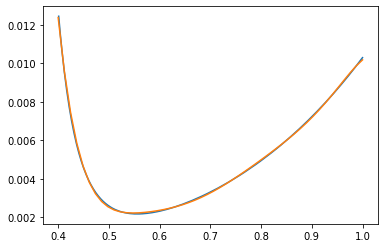

In [6]:
from scipy.optimize import curve_fit
def f(x, a_0, a_1, a_2, a_3, a_4, a_5, a_6, a_7):
    return a_0+ a_1*x+ a_2*x**2 + a_3*x**3 + a_4*x**4 + a_5*x**5 + a_6*x**6 + a_7*x**7
wl = [float(i) for i in file[382:]['wl']]
k = [float(i) for i in file[382:]['n']]
ft, ftt = curve_fit(f, wl, k)
ww = np.linspace(0.4, 1)
plt.plot(wl, k)
plt.plot(ww, [f(w, *ft) for w in ww])
plt.show()

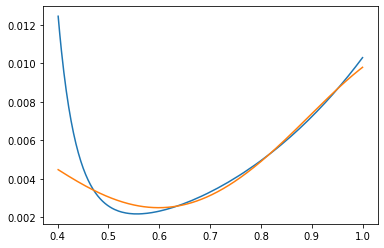

In [26]:
from scipy.optimize import minimize

wl = np.array(wl)
theta = [0, 0, 0, 0]
hypo = lambda theta: theta[0]*wl + theta[1]*wl**2 + theta[2]*wl**3 + theta[3]*wl**4
target = k

FOM = lambda theta: sum(abs(hypo(theta)-target))
res = minimize(FOM, theta)

plt.plot(wl, k)
plt.plot(wl, hypo(res.x))
plt.show()